<h1 style="font-size:2em">Projet 4 - Anticipez les besoins en consommation de bâtiments (Nettoyage)</h1>


# Objectifs

DummyRegressor, Ridge, Lasso -> a utiliser  
GridSearshCV (R2, RMSE, MAE) / Nb k-folds   
0.1 1 10 100 -> log(N) -> Marche mieux    
Algo linéaire, non linéaire, GradiantBoost (X)Boost, Arbre de décision   

- **Objectif:** Ville de Seattle neutre en émissions de carbone en 2050
- Analyse sur la consommation et aux émissions des bâtiments **non destinés à l’habitation.**  
- Comparer une estimation avec des features classiques et avec la feature **ENERGYSTARScore**  
- Targets : **émissions de CO2** + **consommation totale d’énergie**

## Variables

- **OSEBuildingID** : L'ID du batiment	
- **DataYear** : Année de consommation
- **BuildingType** : Type de Building (Résidence ou pas)
- **PrimaryPropertyType** : Type de propriété (Hotel, Ecole...)
- **PropertyName** : Nom du bâtiment
- **Address** : L'adresse du bâtiment
- **City** : La ville ou est situé le bâtiment
- **State** : L'état ou est situé le bâtiment
- **ZipCode** : Code postal (peut etre différent même dans un même état)
- **TaxParcelIdentificationNumber** : Numero identification (fiscale)
- **CouncilDistrictCode** : code du district du conseil de la ville de Seattle  
- **Neighborhood** : Quartier
- **Latitude** : La latitude
- **Longitude** : La longitude
- **YearBuilt** : Date de création ou de rénovation  
- **NumberofBuildings** : Nombre de buildings dans la propriété
- **NumberofFloors** : Nombre d'étages
- **PropertyGFATotal** : Surface brute de plancher totale du bâtiment et du parking 
- **PropertyGFAParking** : Espace brute de tous les types de stationnement  
- **PropertyGFABuilding(s)** : Surface brute du bâtiment  
- **ListOfAllPropertyUseTypes** : Types d'utilisation de la propriété  
- **LargestPropertyUseType** : Type d'utilisation principale de la propriété 
- **LargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation principale)
- **SecondLargestPropertyUseType** : Type d'utilisation secondaire de la propriété 
- **SecondLargestPropertyUseTypeGFA**: Surface brute de plancher (Utilisation secondaire) 
- **ThirdLargestPropertyUseType** : Type d'utilisation tertiaire de la propriété 
- **ThirdLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation tertiaire) 
- **YearsENERGYSTARCertified** : Année auquel la propriété a recu la certification ENERGYSTAR
- **ENERGYSTARScore** : Score (de 1 a 100) qui calcule la performance énergétique d'un bien immobilier
- **SiteEUI(kBtu/sf)** : Energie annuelle consommée d'un bien immobilier / Surface brute de plancher
- **SiteEUIWN(kBtu/sf)** : SiteEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
- **SourceEUI(kBtu/sf)** : Energie annuelle consommée d'un bien immobilier (y compris les pertes) / Surface brute de plancher
- **SourceEUIWN(kBtu/sf)** : SourceEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
- **SiteEnergyUse(kBtu)** : Quantité annuelle d'énergie consommée, toutes sources d'énergie confondues
- **SiteEnergyUseWN(kBtu)** : SiteEnergyUse(kBtu) normalisée en fonctions des conditions météologiques
- **SteamUse(kBtu)** : Quantité annuelle de vapeur urbaine consommée
- **Electricity(kWh)** : Quantité annuelle d'électricité consommée
- **Electricity(kBtu)** : Electricity mais en British thermal units (kBtu)
- **NaturalGas(therms)** : Quantité annuelle de gaz naturel consommée (therms)
- **NaturalGas(kBtu)** : NaturalGas mais en British thermal units (kBtu).
- **DefaultData** : A t'on utilisé des valeurs par défault (fausses valeurs) sur certaines features?
- **Comments** : Commentaires du propriétaire ajoutant du contexte sur les valeurs des features
- **ComplianceStatus** : Satisfait t'il aux exigences de l'analyse de la consommation d'énergie?
- **Outlier** : Ce bâtiment est il dans la moyenne ou exceptionnel?
- **TotalGHGEmissions** : Quantité totale d'émissions de (dioxyde de carbone + le méthane + l'oxyde nitreux)
- **GHGEmissionsIntensity** : TotalGHGEmissions / Surface brute de plancher de la propriété

# Imports et configs

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd 
df = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep = ",")

In [3]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# Supression colonnes ne possédant qu'une seule valeur

In [4]:
import pandas as pd

count_unique = df.nunique()

# Filtrer les colonnes avec une seule valeur unique
columns_with_single_value = count_unique[count_unique == 1].index.tolist()

# Afficher les noms des colonnes avec leur valeur unique
for column in columns_with_single_value:
    unique_value = df[column].unique()[0]
    print(f"Colonne : {column}, Valeur unique : {unique_value}")


Colonne : DataYear, Valeur unique : 2016
Colonne : City, Valeur unique : Seattle
Colonne : State, Valeur unique : WA


Une feature avec une valeur unique ne sert pas a grand chose lors d'une regression ou une classification, on va supprimer ces colonnes

In [5]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=columns_with_single_value)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 46
Nombre de colonnes après la suppression : 43


# Récupérations des bâtiments non destinés à l'habitation

In [6]:
# Recenser toutes les valeurs uniques dans la colonne "BuildingType"
building_types = df["BuildingType"].unique()

# Afficher les valeurs uniques de la colonne "BuildingType"
print(building_types)

['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


- **NonResidential**: Il s'agit d'un type de bâtiment qui n'est pas résidentiel
- **Nonresidential COS**: "Commercial/Office Space" (espace commercial/bureaux)
- **Multifamily MR**: Bâtiments résidentiels multifamiliaux de taille moyenne
- **SPS-District K-12**:"Seattle Public Schools" (Écoles publiques de Seattle).
- **Campus**: Institution éducative, une entreprise ou une organisation.
- **Nonresidential WA**: "Warehouse" (entrepôt)

On va par conséquent supprimer les lignes ou les bâtiments sont résidentiels:
- Multifamily MR (5-9)
- Multifamily LR (1-4)
- Multifamily HR (10+)

In [7]:
print("Nombre de lignes avant la suppression :", df.shape[0])

values_to_exclude = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']
df = df[~df['BuildingType'].isin(values_to_exclude)]

print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 3376
Nombre de lignes après la suppression : 1668


# Suppression colonnes vides

In [8]:
columns_with_only_nan = df.columns[df.isna().all()].tolist()
print("Colonnes avec uniquement des NaN :", columns_with_only_nan)

Colonnes avec uniquement des NaN : ['Comments']


In [9]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(df.columns[df.isna().all()], axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 43
Nombre de colonnes après la suppression : 42


# Suppression lignes ne possédant pas de valeurs ENERGYSTARScore

Si on veut comparer avec la feature ENERGYSTARScore, il vaut mieux avoir toutes ces valeurs

In [10]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['ENERGYSTARScore'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1668
Nombre de lignes après la suppression : 1094


# Suppression lignes ne possédant pas de valeurs pour les targets

On doit avoir toutes les valeurs pour le target TotalGHGEmissions, GHGEmissionsIntensity et SiteEnergyUseWN(kBtu) 

In [11]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['TotalGHGEmissions'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1094
Nombre de lignes après la suppression : 1094


In [12]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['GHGEmissionsIntensity'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1094
Nombre de lignes après la suppression : 1094


In [13]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['SiteEnergyUseWN(kBtu)'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1094
Nombre de lignes après la suppression : 1093


# Suppression nom bâtiment

Le nom du bâtiment n'influence en rien sa consommation en C02

In [14]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns="PropertyName")
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 42
Nombre de colonnes après la suppression : 41


# Suppression IDs

les ID d'un bâtiment n'influence en rien sa consommation de CO2

In [15]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['OSEBuildingID', 'TaxParcelIdentificationNumber'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 41
Nombre de colonnes après la suppression : 39


# Suppression Types propriétés

PrimaryPropertyType et ListOfAllPropertyUseTypes sont remplacables par [LargestPropertyUseType SecondLargestPropertyUseType et ThirdLargestPropertyUseType]

In [16]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['PrimaryPropertyType', 'ListOfAllPropertyUseTypes'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 39
Nombre de colonnes après la suppression : 37


# Suppression métriques géométriques imprécises

La Latitude et la Longitude sont les métriques les plus précises pour situer un bâtiment. En conséquence, "Address", "ZipCode" "CouncilDistrictCode" et "Neighborhood" sont inutiles

In [17]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['Address', 'ZipCode', 'CouncilDistrictCode', 'Neighborhood'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 37
Nombre de colonnes après la suppression : 33


# Suppression lignes avec des valeurs par Défaut

Certaines lignes possèdent des valeurs artificielles, on peut le savoir grace a la colonne DefaultData qui donne True ou False

In [18]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop(df[df['DefaultData'] == True].index)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1093
Nombre de lignes après la suppression : 1005


In [19]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("DefaultData", axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 33
Nombre de colonnes après la suppression : 32


# Suppression lignes avec des valeurs "Non Compliant"

Dans la colonne "ComplianceStatus", si on a "Non Compliant" cela signifie que ce bâtiment ne satisfait pas aux exigences de l'analyse de la consommation d'énergie

In [20]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop(df[df['ComplianceStatus'] == "Non-Compliant"].index)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 1005
Nombre de lignes après la suppression : 996


In [21]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("ComplianceStatus", axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 32
Nombre de colonnes après la suppression : 31


In [22]:
df

,BuildingType,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,NaN,249.98,2.83
1,NonResidential,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.000000,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,NaN,295.86,2.86
2,NonResidential,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,NaN,2089.28,2.19
3,NonResidential,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,NaN,286.43,4.67
4,NonResidential,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.000000,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,Nonresidential COS,47.62251,-122.33390,2014,1.0,13,536697,197659,339038,Office,342838.0,Parking,202178.0,Retail Store,6313.200195,NaN,98.0,37.900002,40.200001,99.199997,101.599998,13239050.00,1.403717e+07,0.00,2.909076e+06,9925769.0,33132.78906,3313279.0,NaN,245.16,0.46
3337,NonResidential,47.65476,-122.34732,2014,1.0,4,126823,41539,85284,Hotel,88157.0,Parking,41539.0,Swimming Pool,0.000000,NaN,72.0,68.500000,68.500000,169.500000,169.500000,6042399.50,6.042400e+06,0.00,1.206219e+06,4115620.0,19267.79102,1926779.0,NaN,131.02,1.03
3338,NonResidential,47.54425,-122.31776,1955,1.0,1,52085,4222,47863,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,NaN,37.0,69.199997,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,2873052.0,NaN,157.70,3.03
3339,NonResidential,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,2253621.0,NaN,134.80,5.39


# Supression colonne Outlier

In [23]:
# Obtenez toutes les valeurs uniques dans la colonne "ComplianceStatus"
unique_values = df["Outlier"].unique()

# Affichez toutes les valeurs uniques
print(unique_values)

[nan]


Cette colonne ne possède que des NaN

In [24]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("Outlier", axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 31
Nombre de colonnes après la suppression : 30


# Supression NaturalGas(kBtu)

NaturalGas(kBtu) et NaturalGas(therms) représentent la même chose, sauf que NaturalGas(therms) possède des valeurs légèrement plus précises  
22536.21094 (terms) contre 2253621.0 (kBtu) par exemple

In [25]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("NaturalGas(kBtu)", axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 30
Nombre de colonnes après la suppression : 29


# Supression Electricity(kWh)

Electricity(kWh) et	Electricity(kBtu) représentent la même chose mais la version kBtu possédant une précision a un chiffre après la virgule contrairement a kWh qui est uniquement en nombre entier  
1.156514e+06 (kWh)	3946027.0 (kBtu)

In [26]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("Electricity(kWh)", axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 29
Nombre de colonnes après la suppression : 28


# Supression (SiteEUI(kBtu/sf) et SiteEUIWN(kBtu/sf)) et (SourceEUI(kBtu/sf) et SourceEUIWN(kBtu/sf))

Notre target est la consommation totale d'énergie et non une consommation rapportée a la surface brute du plancher

In [27]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 28
Nombre de colonnes après la suppression : 24


# Supression SiteEnergyUse(kBtu)

#### SiteEnergyUseWN(kBtu) est une métrique plus précise que SiteEnergyUse(kBtu)

In [28]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['SiteEnergyUse(kBtu)'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 24
Nombre de colonnes après la suppression : 23


# Supression GHGEmissionsIntensity

Notre target est TotalGHGEmissions (total consommation CO2), GHGEmissionsIntensity n'est pas à considérer

In [29]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['GHGEmissionsIntensity'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 23
Nombre de colonnes après la suppression : 22


# Supression YearsENERGYSTARCertified

L'année dans lequel on a donné la certification ENERGYSTAR n'a aucune influence sur nos targets

In [30]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['YearsENERGYSTARCertified'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 22
Nombre de colonnes après la suppression : 21


# Mettre SiteEnergyUseWN(kBtu) a la dernière colonne

Pour mieux voir les 2 targets, on met SiteEnergyUseWN(kBtu) à la fin

In [31]:
df = df[[col for col in df.columns if col != 'SiteEnergyUseWN(kBtu)'] + ['SiteEnergyUseWN(kBtu)']]

# Transformer YearBuilt en "Age"

YearBuilt n'a pas trop de sens si on ne sait pas quel age a le bâtiment, comme toutes ces valeurs ont été récupérés en 2016, on peut facilement transformer cette colonne en un age

In [32]:
# Calculer l'âge en soustrayant chaque valeur de YearBuilt de 2016
df['Age'] = 2016 - df['YearBuilt']

# Réorganiser les colonnes pour placer "Age" avant "YearBuilt"
df = df[['Age'] + [col for col in df.columns if col != 'Age' and col != 'YearBuilt']]


# Supression colonnes fortement corrélés

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap_correlation_colonnes(df, seuil_corr=0.95, figsize=(10, 8)):
    # Calculer la matrice de corrélation
    corr = df.corr(numeric_only=True)

    # Créer la heatmap
    fig, ax = plt.subplots(figsize=figsize)
    heatmap = sns.heatmap(corr, annot=True, fmt=".2f", ax=ax)

    # Incliner le texte des colonnes
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=55, ha='right')

    # Trouver les colonnes fortement corrélées
    correlated_pairs = []
    correlation_values = {}  # un dictionnaire pour stocker les valeurs de corrélation

    for i in range(len(corr.columns)):
        for j in range(i + 1, len(corr.columns)):
            if corr.iloc[i, j] >= seuil_corr:
                col1 = corr.columns[i]
                col2 = corr.columns[j]
                correlated_pairs.append((col1, col2))
                correlation_values[(col1, col2)] = corr.iloc[i, j]

    # Afficher les colonnes fortement corrélées et leurs valeurs de corrélation
    print("Les paires de colonnes fortement corrélées entre elles sont :")
    for pair in correlated_pairs:
        print(f"{pair[0]} et {pair[1]} : {correlation_values[pair]:.2f}")

    plt.show()

    return correlated_pairs, correlation_values


Les paires de colonnes fortement corrélées entre elles sont :
PropertyGFATotal et PropertyGFABuilding(s) : 0.98
PropertyGFABuilding(s) et LargestPropertyUseTypeGFA : 0.95


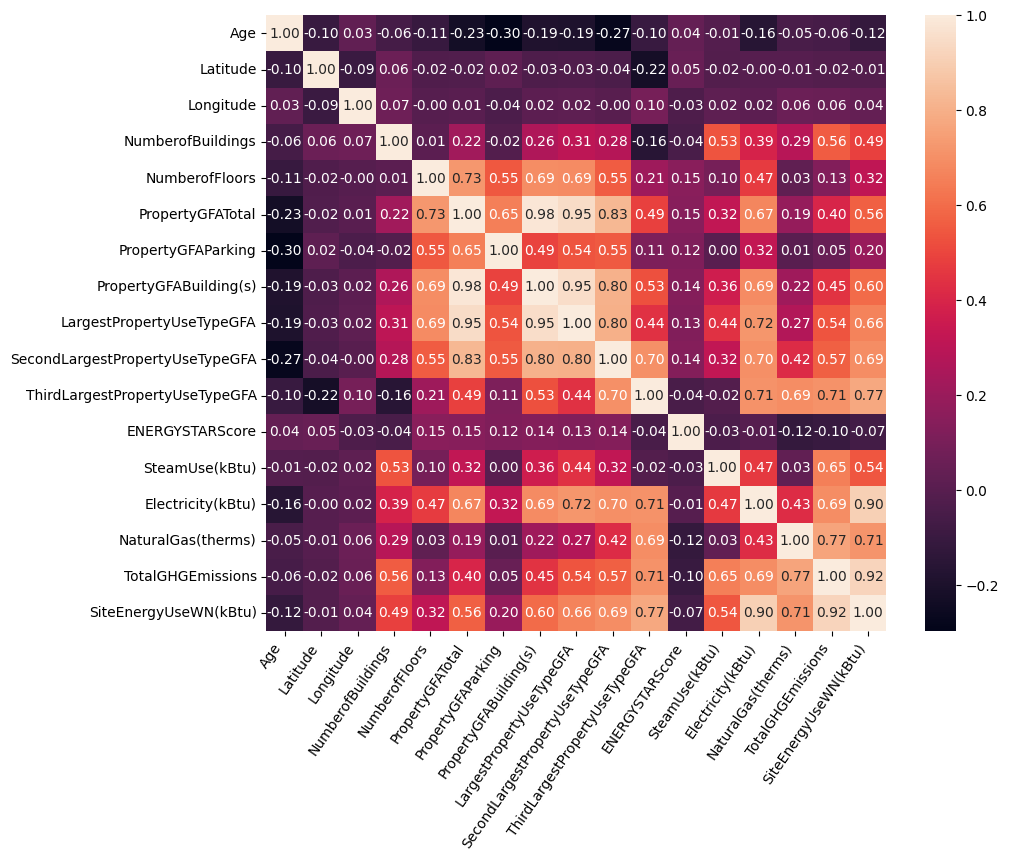

In [34]:
colonnes_corelees = heatmap_correlation_colonnes(df)

On va supprimer PropertyGFATotal et PropertyGFABuilding(s)

In [35]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop(columns=['PropertyGFATotal', 'PropertyGFABuilding(s)'])
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 21
Nombre de colonnes après la suppression : 19


# Supression lignes possédant des NaN

In [36]:
nan_counts = df.isna().sum()
nan_counts

Age                                  0
BuildingType                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFAParking                   0
LargestPropertyUseType               2
LargestPropertyUseTypeGFA            2
SecondLargestPropertyUseType       505
SecondLargestPropertyUseTypeGFA    505
ThirdLargestPropertyUseType        841
ThirdLargestPropertyUseTypeGFA     841
ENERGYSTARScore                      0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(therms)                   0
TotalGHGEmissions                    0
SiteEnergyUseWN(kBtu)                0
dtype: int64

LargestPropertyUseType et LargestPropertyUseTypeGFA ne doivent pas posséder de NaN

In [37]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df.dropna(subset=['LargestPropertyUseType', 'LargestPropertyUseTypeGFA'], inplace=True)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 996
Nombre de lignes après la suppression : 994


# Supression lignes Type =! NaN MAIS TypeGFA = 0 ou NaN

## SecondLargestPropertyUseType

On vérifie si on a pas des cas ou SecondLargestPropertyUseType =! NaN mais que SecondLargestPropertyUseTypeGFA = 0 ou NaN

In [38]:
import pandas as pd
import numpy as np

# Supposons que votre dataframe s'appelle df

# Sélectionner les lignes où SecondLargestPropertyUseType n'est pas égal à 0
condition1 = ~df['SecondLargestPropertyUseType'].isna()

# Sélectionner les lignes où SecondLargestPropertyUseTypeGFA est égal à NaN ou à 0
condition2 = df['SecondLargestPropertyUseTypeGFA'].isna() | (df['SecondLargestPropertyUseTypeGFA'] == 0)

# Appliquer les deux conditions pour filtrer le dataframe
result = df[condition1 & condition2]
result.shape[0]

57

In [39]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop(result.index)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 994
Nombre de lignes après la suppression : 937


## ThirdLargestPropertyUseType

On vérifie si on a pas des cas ou ThirdLargestPropertyUseType =! NaN mais que ThirdLargestPropertyUseTypeGFA = 0 ou NaN

In [40]:
import pandas as pd
import numpy as np

# Supposons que votre dataframe s'appelle df

# Sélectionner les lignes où SecondLargestPropertyUseType n'est pas égal à 0
condition1 = ~df['ThirdLargestPropertyUseType'].isna()

# Sélectionner les lignes où SecondLargestPropertyUseTypeGFA est égal à NaN ou à 0
condition2 = df['ThirdLargestPropertyUseTypeGFA'].isna() | (df['ThirdLargestPropertyUseTypeGFA'] == 0)

# Appliquer les deux conditions pour filtrer le dataframe
result = df[condition1 & condition2]
result.shape[0]


12

In [41]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop(result.index)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 937
Nombre de lignes après la suppression : 925


In [42]:
df

,Age,BuildingType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(therms),TotalGHGEmissions,SiteEnergyUseWN(kBtu)
0,89,NonResidential,47.61220,-122.33799,1.0,12,0,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,2003882.00,3946027.0,12764.52930,249.98,7456910.00
1,20,NonResidential,47.61317,-122.33393,1.0,11,15064,Hotel,83880.0,Parking,15064.0,Restaurant,4622.000000,61.0,0.00,3242851.0,51450.81641,295.86,8664479.00
2,47,NonResidential,47.61393,-122.33810,1.0,41,196718,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,21566554.00,49526664.0,14938.00000,2089.28,73937112.00
3,90,NonResidential,47.61412,-122.33664,1.0,10,0,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,2214446.25,2768924.0,18112.13086,286.43,6946800.50
6,90,NonResidential,47.61390,-122.33283,1.0,11,0,Hotel,81352.0,NaN,NaN,NaN,NaN,27.0,0.00,2811215.0,29475.80078,176.14,6062767.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3320,2,NonResidential,47.62146,-122.33976,1.0,12,163260,Office,341897.0,Parking,136594.0,NaN,NaN,99.0,0.00,11452968.0,12670.99023,147.14,12926544.00
3324,1,NonResidential,47.62263,-122.33976,1.0,12,166208,Office,342173.0,Parking,147597.0,NaN,NaN,98.0,0.00,11733018.0,22656.19141,202.12,14409447.00
3329,2,Nonresidential COS,47.62251,-122.33390,1.0,13,197659,Office,342838.0,Parking,202178.0,Retail Store,6313.200195,98.0,0.00,9925769.0,33132.78906,245.16,14037166.00
3338,61,NonResidential,47.54425,-122.31776,1.0,1,4222,Non-Refrigerated Warehouse,52085.0,NaN,NaN,NaN,NaN,37.0,0.00,732803.0,28730.51953,157.70,4182621.75


# Transformation des NaN en 0

In [43]:
# Comptez les valeurs manquantes pour chaque colonne
nb_nan_par_colonne = df.isna().sum()

# Affichez le résultat
print(nb_nan_par_colonne)

Age                                  0
BuildingType                         0
Latitude                             0
Longitude                            0
NumberofBuildings                    0
NumberofFloors                       0
PropertyGFAParking                   0
LargestPropertyUseType               0
LargestPropertyUseTypeGFA            0
SecondLargestPropertyUseType       503
SecondLargestPropertyUseTypeGFA    503
ThirdLargestPropertyUseType        784
ThirdLargestPropertyUseTypeGFA     784
ENERGYSTARScore                      0
SteamUse(kBtu)                       0
Electricity(kBtu)                    0
NaturalGas(therms)                   0
TotalGHGEmissions                    0
SiteEnergyUseWN(kBtu)                0
dtype: int64


SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA ont des NaN, ce qui signifie que leur surface est nulle, on transforme ces NaN en zero

In [44]:
df['SecondLargestPropertyUseTypeGFA'] = df['SecondLargestPropertyUseTypeGFA'].fillna(0)
df['ThirdLargestPropertyUseTypeGFA'] = df['ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [45]:
df.head()

,Age,BuildingType,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(therms),TotalGHGEmissions,SiteEnergyUseWN(kBtu)
0,89,NonResidential,47.61220,-122.33799,1.0,12,0,Hotel,88434.0,NaN,0.0,NaN,0.0,60.0,2003882.00,3946027.0,12764.52930,249.98,7456910.0
1,20,NonResidential,47.61317,-122.33393,1.0,11,15064,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.00,3242851.0,51450.81641,295.86,8664479.0
2,47,NonResidential,47.61393,-122.33810,1.0,41,196718,Hotel,756493.0,NaN,0.0,NaN,0.0,43.0,21566554.00,49526664.0,14938.00000,2089.28,73937112.0
3,90,NonResidential,47.61412,-122.33664,1.0,10,0,Hotel,61320.0,NaN,0.0,NaN,0.0,56.0,2214446.25,2768924.0,18112.13086,286.43,6946800.5
6,90,NonResidential,47.61390,-122.33283,1.0,11,0,Hotel,81352.0,NaN,0.0,NaN,0.0,27.0,0.00,2811215.0,29475.80078,176.14,6062767.5


# Supression des lignes (Parking)

On va supprimer les lignes ou on a une surface de Parking > 0 mais ou c'est indiqué nul part qu'on utilise cette surface 

In [46]:
df_filtered = df[df['PropertyGFAParking'] != 0]
df_filtered = df_filtered[(df_filtered["LargestPropertyUseType"] != "Parking") & (df_filtered["SecondLargestPropertyUseType"] !=  "Parking") & (df_filtered["ThirdLargestPropertyUseType"] !=  "Parking") & (df_filtered["ThirdLargestPropertyUseTypeGFA"] == 0)]

In [47]:
df_filtered_head = df_filtered.loc[:, ['PropertyGFAParking', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType' , 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA']]
df_filtered_head.head()

,PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
2,196718,Hotel,756493.0,NaN,0.0,NaN,0.0
10,19279,Hotel,133884.0,NaN,0.0,NaN,0.0
11,61161,Hotel,336640.0,NaN,0.0,NaN,0.0
27,38281,Hotel,128909.0,NaN,0.0,NaN,0.0
29,16200,Hotel,47994.0,NaN,0.0,NaN,0.0


In [48]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop(df_filtered.index)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 925
Nombre de lignes après la suppression : 868


On va aussi supprimer les lignes ou on n'a pas d'égalité entre PropertyGFAParking (>0) et SecondLargestPropertyUseTypeGFA (Parking)

In [49]:
df_filtered = df.loc[(df['PropertyGFAParking'] != df['SecondLargestPropertyUseTypeGFA']) & (df['SecondLargestPropertyUseType'] == "Parking")  & (df['PropertyGFAParking'] != 0)]

In [50]:
print("Nombre de lignes avant la suppression :", df.shape[0])
df = df.drop(df_filtered.index)
print("Nombre de lignes après la suppression :", df.shape[0])

Nombre de lignes avant la suppression : 868
Nombre de lignes après la suppression : 759


On va maintenant supprimer la colonne PropertyGFAParking (elle ne sert plus a rien)

In [51]:
print("Nombre de colonnes avant la suppression :", df.shape[1])
df = df.drop("PropertyGFAParking", axis=1)
print("Nombre de colonnes après la suppression :", df.shape[1])

Nombre de colonnes avant la suppression : 19
Nombre de colonnes après la suppression : 18


In [52]:
df

,Age,BuildingType,Latitude,Longitude,NumberofBuildings,NumberofFloors,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(therms),TotalGHGEmissions,SiteEnergyUseWN(kBtu)
0,89,NonResidential,47.61220,-122.33799,1.0,12,Hotel,88434.0,NaN,0.0,NaN,0.0,60.0,2003882.00,3946027.0,12764.529300,249.98,7456910.0
1,20,NonResidential,47.61317,-122.33393,1.0,11,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.00,3242851.0,51450.816410,295.86,8664479.0
3,90,NonResidential,47.61412,-122.33664,1.0,10,Hotel,61320.0,NaN,0.0,NaN,0.0,56.0,2214446.25,2768924.0,18112.130860,286.43,6946800.5
6,90,NonResidential,47.61390,-122.33283,1.0,11,Hotel,81352.0,NaN,0.0,NaN,0.0,27.0,0.00,2811215.0,29475.800780,176.14,6062767.5
8,112,NonResidential,47.60294,-122.33263,1.0,15,Hotel,163984.0,NaN,0.0,NaN,0.0,43.0,0.00,7297919.0,64259.000000,392.16,14194054.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,46,NonResidential,47.65447,-122.31733,1.0,0,Residence Hall/Dormitory,89392.0,NaN,0.0,NaN,0.0,16.0,0.00,6960904.0,0.000000,48.53,7483350.0
3280,5,NonResidential,47.65176,-122.30756,1.0,0,Residence Hall/Dormitory,97040.0,NaN,0.0,NaN,0.0,69.0,0.00,3129824.0,7643.180176,62.41,4075094.5
3281,2,NonResidential,47.62384,-122.33941,1.0,6,Office,427181.0,Parking,169195.0,NaN,0.0,99.0,0.00,14213039.0,21579.984380,213.70,16810854.0
3319,1,NonResidential,47.61665,-122.33261,1.0,14,Hotel,159500.0,NaN,0.0,NaN,0.0,89.0,0.00,5269208.0,2558.640137,50.32,5547964.5


# Transformation colonnes strings en colonnes binaires (one-hot)

Pour améliorer notre regression, nous pouvons transformers certaines colonnes quantitatives en colonnes qualitatives

## BuildingType

In [53]:
import pandas as pd

def one_hot(df, column_name):
    return pd.get_dummies(df, columns=[column_name])


In [54]:
print("Nombre de colonnes avant l'encodage :", df.shape[1])
df = one_hot(df, "BuildingType")
print("Nombre de colonnes après l'encodage :", df.shape[1])

Nombre de colonnes avant l'encodage : 18
Nombre de colonnes après l'encodage : 21


## LargestPropertyUseType

In [55]:
print("Nombre de colonnes avant l'encodage :", df.shape[1])
df = one_hot(df, "LargestPropertyUseType")
print("Nombre de colonnes après l'encodage :", df.shape[1])

Nombre de colonnes avant l'encodage : 21
Nombre de colonnes après l'encodage : 41


## SecondLargestPropertyUseType

In [56]:
print("Nombre de colonnes avant l'encodage :", df.shape[1])
df = one_hot(df, "SecondLargestPropertyUseType")
print("Nombre de colonnes après l'encodage :", df.shape[1])

Nombre de colonnes avant l'encodage : 41
Nombre de colonnes après l'encodage : 69


## ThirdLargestPropertyUseType

In [57]:
print("Nombre de colonnes avant l'encodage :", df.shape[1])
df = one_hot(df, "ThirdLargestPropertyUseType")
print("Nombre de colonnes après l'encodage :", df.shape[1])

Nombre de colonnes avant l'encodage : 69
Nombre de colonnes après l'encodage : 95


In [58]:
df.shape

(759, 95)

# Création Colonnes binaires d'usage

Pour SteamUse(kBtu), Electricity(kBtu) et NaturalGas(therms), il vaut mieux rajouter des colonnes binaires qui indiquent si oui ou non on utilise du Steam, Electrecity, Gas...   

De plus, garder SteamUse(kBtu), Electricity(kBtu) et NaturalGas(therms) causerait un probleme de data-leakage car ces données sont directement corrélés à nos targets

In [59]:
# Fonction conditionnelle pour créer les nouvelles colonnes
def create_usage_column(value):
    if value == 0:
        return 0
    else:
        return 1

# Création des nouvelles colonnes
df['SteamUse(kBtu)_Usage'] = df['SteamUse(kBtu)'].apply(create_usage_column)
df['Electricity(kBtu)_Usage'] = df['Electricity(kBtu)'].apply(create_usage_column)
df['NaturalGas(therms)_Usage'] = df['NaturalGas(therms)'].apply(create_usage_column)

In [60]:
df.head()

,Age,Latitude,Longitude,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(therms),TotalGHGEmissions,SiteEnergyUseWN(kBtu),BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_Adult Education,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Entertainment/Public Assembly,SecondLargestPropertyUseType_Other - Recreation,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Other - Services,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Performing Arts,SecondLargestPropertyUseType_Pre-school/Daycare,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Bank Branch,ThirdLargestPropertyUseType_Bar/Nightclub,ThirdLargestPropertyUseType_Data Center,ThirdLargestPropertyUseType_Distribution Center,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym,ThirdLargestPropertyUseType_Food Service,ThirdLargestPropertyUseType_Hotel,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Other/Specialty Hospital,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Worship Facility,SteamUse(kBtu)_Usage,Electricity(kBtu)_Usage,NaturalGas(therms)_Usage
0,89,47.61220,-122.33799,1.0,12,88434.0,0.0,0.0,60.0,2003882.00,3946027.0,12764.52930,249.98

In [61]:
import pandas as pd

# Supprimer les colonnes du dataframe
df = df.drop(["SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(therms)"], axis=1)


In [62]:
df.to_csv('DataCleaned.csv', index=False)